In [1]:
from IPython.display import display, HTML

# Set the width to a specific percentage of the screen width, e.g., 100%
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from os import path
from imgproj.classifier.img_configuration import ModelConf

PROJECT_ROOT = path.abspath(path.join(globals()['_dh'][0], '..'))
DATALAKE_PATH = path.abspath(path.join(PROJECT_ROOT, '..', '..', 'datalake', 'mlpbertproj'))
FQFN_PROCESSED_DF = path.join(DATALAKE_PATH, 'processed', f'processed_20250205.jsonl')

In [3]:
from trainer import mlpbert_folder_loader

wtl = mlpbert_folder_loader.MlpBertFolderLoader()
wtl.read(DATALAKE_PATH, labels=['0', '1'])

2025-02-07 13:57:24,244 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:24,254 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True


Creating tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Test files processing:   0%|          | 0/699 [00:00<?, ?it/s]

2025-02-07 13:57:26,968 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:26,988 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 13:57:27,137 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:27,156 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 13:57:27,158 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:27,175 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 13:57:27,186 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:27,213 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 13:57:27,222 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 13:57:27,226

In [4]:
df = wtl.df
df[['file_name', 'text_body', 'text_embeddings', 'label']]

,file_name,text_body,text_embeddings,label
0,1263.ps1,\nfunction Test-CFirewallStatefulFtp\n{\n \...,"[0.14546397, -0.117149144, -0.07609469, 0.4179...",0
1,1302.ps1,\nfunction Test-CPrivilege\n{\n \n [Cmdl...,"[0.18808816, -0.12950282, -0.16918091, 0.03715...",0
2,1277.ps1,\nfunction Unlock-CIisConfigurationSection\n{\...,"[0.16294506, -0.039772317, -0.23034653, 0.3275...",0
3,1289.ps1,\nfunction Get-CMsmqMessageQueue\n{\n \n ...,"[0.04375805, 0.04494962, -0.17380461, 0.147903...",0
4,1048.ps1,\n\n\n\n\n\n\n\n\n\n\n\n& (Join-Path $TestDir ...,"[0.1572832, 0.21540433, -0.07781442, 0.0832560...",0
...,...,...,...,...
694,1119.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...","[0.13939235, 0.083871484, -0.2884198, -0.07378...",1
695,102.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...","[0.1366064, 0.07679893, -0.28689435, -0.078882...",1
696,116.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...","[0.14418125, 0.07302419, -0.28165057, -0.04663...",1
697,1051.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...","[0.14119795, 0.07321636, -0.27993864, -0.04609...",1


<Axes: >

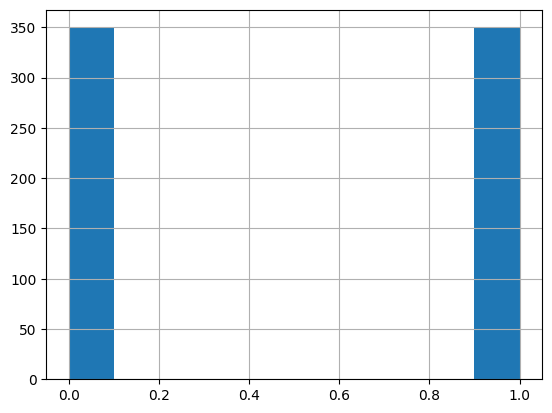

In [5]:
df['label'].hist()

In [6]:
for label in df['label'].unique():
    sampled_df = df[df['label'] == label]['text_embeddings'].sample(n=10)
    print(f'Sampled DataFrame for label {label}:')
    display(sampled_df)

Sampled DataFrame for label 0:


164    [0.04271911, 0.12417361, -0.05716272, 0.008482...
224    [0.14865695, 0.085423686, -0.16148503, 0.11324...
133    [0.014764607, 0.035134718, 0.051055454, -0.000...
6      [0.12002105, 0.05599911, -0.17737901, 0.109001...
56     [0.07185745, 0.05627069, -0.19755262, 0.133730...
261    [0.20900784, 0.03876629, -0.049986277, 0.29384...
116    [0.122072496, 0.19600637, -0.028352963, -0.118...
24     [0.23070085, 0.15986465, -0.05553736, 0.145044...
318    [0.006601423, 0.042171553, 0.026498497, 0.2484...
40     [0.22360975, 0.101565845, 0.091915935, 0.20829...
Name: text_embeddings, dtype: object

Sampled DataFrame for label 1:


415    [0.20802586, 0.4288777, 0.07290916, -0.2088392...
452    [0.13832782, 0.085495405, -0.2918274, -0.07251...
458    [0.13314843, 0.07204379, -0.27366573, -0.07286...
409    [0.14001195, 0.083711356, -0.2885557, -0.07711...
619    [0.1320505, 0.10354328, -0.31177133, -0.014924...
630    [0.18816495, 0.43386018, 0.08810195, -0.191914...
504    [0.12013904, 0.052123252, -0.30900985, -0.1274...
531    [0.14450482, 0.32300824, -0.063805915, -0.0577...
530    [0.13823967, 0.08366603, -0.28963017, -0.07427...
656    [0.20802586, 0.4288777, 0.07290916, -0.2088392...
Name: text_embeddings, dtype: object

In [7]:
df.to_json(FQFN_PROCESSED_DF, orient='records', lines=True)